In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

def estimate_and_ci(num_trials, num_success):
    p_hat = num_success / num_trials
    z = 1.96
    delta = z * np.sqrt(p_hat * (1 - p_hat) / num_trials)
    return (p_hat,(p_hat - delta, p_hat + delta))

Experimental results: flipping coins in series
----------------------------------------------

Each of 15 students take turns flipping a coin 30 times and recording
how many heads they got. There is a suspicion that some of the students
did not actually do this properly. Some people think they just wrote
down some garbage and went to lunch early.

Read the data in `experiement1.csv` into a `DataFrame`.

In [2]:
exp1 = pd.read_csv("experiment1.csv")

Compute the point estimate and CI using the function you wrote above.

In [3]:
head_counts = exp1.drop(columns="flip_number").groupby("name").sum()
head_counts["name"] = head_counts.index.copy()

total_heads = int(head_counts["outcome"].sum())
num_people = int(head_counts["name"].unique().size)
num_flips = int(exp1["name"].value_counts().unique())

est_and_ci = estimate_and_ci(num_success=total_heads,
                             num_trials=num_people * num_flips)

print(est_and_ci)

(0.49333333333333335, (0.44713979693549655, 0.5395268697311701))


We estimate the probability of heads as 0.49 with a $95\%$ CI of
(0.45,0.54). We are not able to reject the null hypothesis that the coin
is fair.

### Question

Generate a histogram of the number of heads from each student. As an
extension, include the binomial distribution supported by your estimate
that is most amenable to large value outcomes.

### Answer

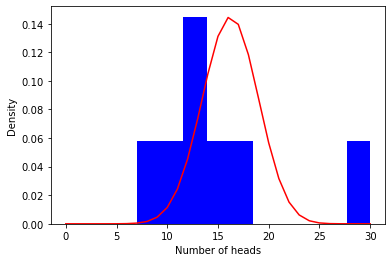

In [4]:
k_vals = range(0,30+1)
k_probs = stats.binom.pmf(k = k_vals, n = num_flips, p = 0.540)
binom_dist_df = pd.DataFrame({"value": k_vals,
                              "prob": k_probs})

plt.figure()
plt.hist(head_counts.outcome, color="blue", density=True)
plt.plot(binom_dist_df.value, binom_dist_df.prob, color="red")
plt.xlabel("Number of heads")
plt.ylabel("Density")
plt.show()

### Question

It looks like there might be a couple of strange points in this dataset
as suspected. Using the upper bound on $p$ calculate the probability of
someone getting all heads. Write a couple of sentences explaining
whether you think it is reasonable to remove those data points.

### Answer

In [5]:
stats.binom.pmf(k = 30, n = 30, p = 0.54)

9.371579521404065e-09

-   Even allowing for a high estimate of the probability of heads it
    seems unlikely that the 30 heads are genuine, hence we removed them
    from the data set prior to further analysis.

### Question

Once the questionable data has been removed, plot the distribution of
the estimated binomial distribution on top of the histogram. Write a
couple of sentences explaining what you think about the coin now.

### Answer

(0.4153846153846154, (0.3664761437453554, 0.4642930870238754))


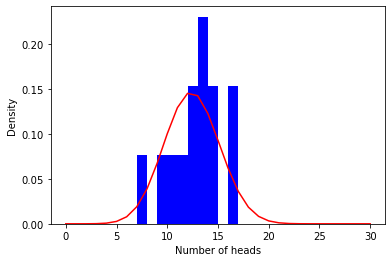

In [6]:
head_counts_clean = head_counts.loc[head_counts["outcome"] < 30]

total_heads_clean = int(head_counts_clean["outcome"].sum())
num_people_clean = int(head_counts_clean["name"].unique().size)

print(estimate_and_ci(num_success=total_heads_clean, num_trials=num_people_clean * num_flips))

k_vals = range(0,31)
k_probs = [stats.binom.pmf(k = k, n = num_flips, p = 0.415) for k in k_vals]
binom_dist_df = pd.DataFrame({"value": k_vals,
                              "prob": k_probs})

plt.figure()
plt.hist(head_counts_clean.outcome, color="blue", density=True)
plt.plot(binom_dist_df.value, binom_dist_df.prob, color="red")
plt.xlabel("Number of heads")
plt.ylabel("Density")
plt.show()

-   After removing two outliers, we estimate the probability of heads as
    $0.42$ with a $95\%$ CI of $(0.37, 0.46)$.
-   Given the CI does not contain the value 0.5, we can reject the null
    hypothesis that the coin is fair.

Experimental results: flipping coins in parallel
------------------------------------------------

The royal mint has become interested and wants to study an additional 49
coins and repeat the experiment to gather more data about the
fascinating topic of coin bias. Now, each of 50 students is given a coin
each and asked to flip the coin 30 times and record the results.

### Question

Do we need to change anything about how we analyse this data? If so,
why, if not, why not? **Hint:** there are good arguments that can be
given for each answer. Once you have answered one way, try to answer the
other way.

### Answer

If you assume the coins have the same probability of heads it is fine.
If you assume that the coins vary then you would need to adjust the
model.

### Question

Using the data in `experiment2.csv` explore the data set using the
methodology devised above and write a couple of sentences to explain
what you found.

### Answer

In [7]:
exp2 = pd.read_csv("experiment2.csv")

head_counts = exp2.drop(columns="flip_number").groupby("name").sum()
head_counts["name"] = head_counts.index.copy()

total_heads = int(head_counts["outcome"].sum())
num_people = int(head_counts["name"].unique().size)
num_flips = int(exp2["name"].value_counts().unique())

estimate = estimate_and_ci(num_success=total_heads, 
                           num_trials=num_people * num_flips)

print(estimate)

(0.4013333333333333, (0.37652739859779666, 0.42613926806887))


### Question

Visualise the number of heads each student got and compare the variance
in this to what is predicted by theory.

### Answer

18.69224489795919 7.2079466666666665


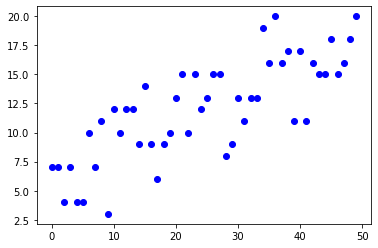

In [8]:
emp_var = head_counts["outcome"].var()
thry_var = stats.binom.var(n = num_flips, p = estimate[0])
print(emp_var,thry_var)

plt.figure()
plt.scatter(head_counts.name, head_counts.outcome, color="blue")
plt.show()

-   There appears to be systematic differences in the number of heads
    obtained.
-   The variance is too great.
-   It seems that we should not consider all the coins as identical.

### Question

Consider how you might analyse this data. Over the following weeks you
will learn a couple of approaches.

### Answer

One could use a negative binomial distribution if one were interested in
an empirical analysis or a hierarchical model if one were interested in
a structural analysis.